In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/arib168/data/main/Underweight-knn.csv")
df

,Weight(x2),Height(y2),Class
0,51,167,Underweight
1,62,182,Normal
2,69,176,Normal
3,64,173,Normal
4,65,172,Normal
5,56,174,Underweight
6,58,169,Normal
7,57,173,Normal
8,55,170,Normal
9,53,171,Underweight


In [ ]:
df = df.drop(['Class'],axis=1) #drop unwanted columns
df

,Weight(x2),Height(y2)
0,51,167
1,62,182
2,69,176
3,64,173
4,65,172
5,56,174
6,58,169
7,57,173
8,55,170
9,53,171


In [ ]:
x = df['Weight(x2)']
y = df['Height(y2)']

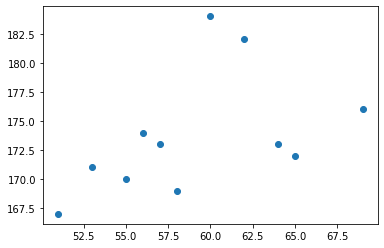

In [ ]:
plt.scatter(x,y)

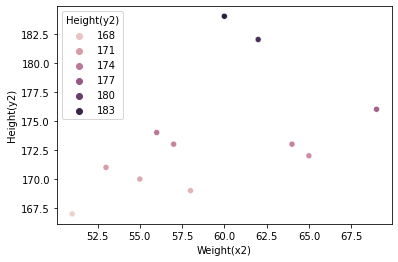

In [ ]:
import seaborn as sns 
sns.scatterplot(x=df['Weight(x2)'], y=df['Height(y2)'],data = df,hue = df['Height(y2)'])

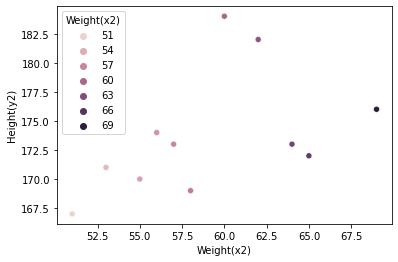

In [ ]:
sns.scatterplot(x=df['Weight(x2)'], y=df['Height(y2)'],data = df,hue = df['Weight(x2)'])

K MEANS CLUSTERING

In [1]:
import pandas as pd

In [2]:
# https://raw.githubusercontent.com/arib168/data/main/Mall_Customers.csv
df = pd.read_csv("https://raw.githubusercontent.com/arib168/data/main/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


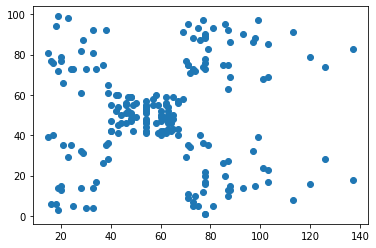

In [4]:
import matplotlib.pyplot as plt 
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

In [5]:
# looking at this, we can consider k=5 #to confirm , use elbow method

In [6]:
x = df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
# k = 2 to 14
import numpy as np 
np.sqrt(200)

14.142135623730951

In [8]:
# elbow method to find the k value and to confirm if it is 5 
# find the error/inertia of all the values from 2 to 14
# plot the graph to show this error


from sklearn.cluster import KMeans 
k = range(2,14)
sse = []  #error 
for i in k:
  model_demo = KMeans(n_clusters=i,random_state=0)
  model_demo.fit(x) 
  sse.append(model_demo.inertia_)


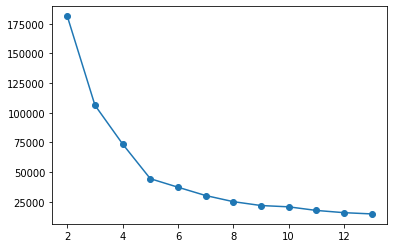

In [9]:
plt.scatter(k,sse) #plot the error for every k value 
plt.plot(k,sse) #consider the point where the elbow is most prominent, 
                #that point whatever k value is there, that is the best number of clusters to be considered

In [10]:
#Applying the algorithm 
k = 5
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k,random_state=0)
model.fit(x)
y = model.predict(x)
y   #it generates the output according to feature similarity
    #tells to which cluster every point belongs to (0,1,2,3,4)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [11]:
np.unique(y,return_counts = True) #prints no. of values out of 200 in each of the 5 clusters

(array([0, 1, 2, 3, 4], dtype=int32), array([35, 81, 39, 22, 23]))

In [12]:
35+81+39+22+23

200

In [14]:
x[y == 0,0] #0th cluster , 0 - x axis

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137])

In [15]:
x[y == 0,1] #0th cluster, 1 - y-axis

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18])

In [16]:
x[y == 1,0]  #

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76])

In [17]:
x[y == 1,1]

array([61, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55,
       52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52,
       42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52,
       47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42,
       46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 35, 34, 40])

In [18]:
# cluster_centers = centroid of the cluster
model.cluster_centers_
 # 88.2,17.11428571
  #  x,y positions of the centroid

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

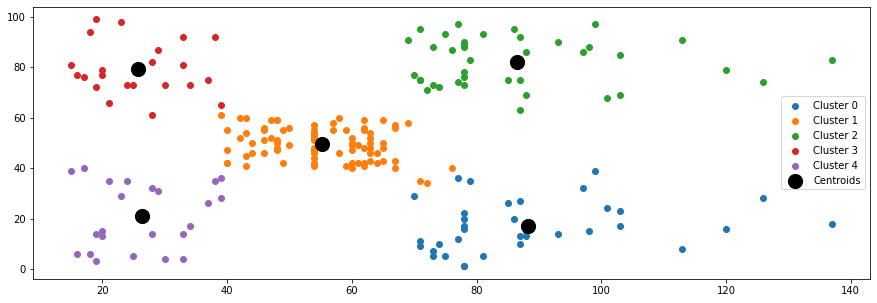

In [13]:
plt.figure(figsize=(15,5))
for i in range(k):
  plt.scatter(x[y==i,0],x[y==i,1],label = f'Cluster {i}')
  
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=200,c='black',label = 'Centroids')
plt.legend()
plt.show()